# 数据处理与读取


In [1]:
# 导包
import os
import numpy as np
import pandas as pd

In [2]:
# 查看input文件
for root,dirs,filenames in os.walk("/content"):
  for filename in filenames:
    print(os.path.join(root, filename))

/content/sample.csv
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/default_configs.db
/content/.config/config_sentinel
/content/.config/configurations/config_default
/content/.config/logs/2024.04.04/13.23.55.253222.log
/content/.config/logs/2024.04.04/13.24.28.357022.log
/content/.config/logs/2024.04.04/13.23.27.973093.log
/content/.config/logs/2024.04.04/13.24.16.708234.log
/content/.config/logs/2024.04.04/13.24.29.089504.log
/content/.config/logs/2024.04.04/13.24.06.850857.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


In [3]:
# 读取文件
datasets = pd.read_csv("/content/sample.csv")
# 只取需要的column
datasets = datasets[['text', 'target']]
datasets.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# 切分训练集合，拆分为训练集合和测试集合
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(datasets, train_size=0.95)
print(train_df.shape)
print(train_df.head())

# 为防止每次训练集合和测试集合都不一样，需要把训练集合和测试集合保存
train_df.to_csv('./train.csv', index=False, header=None)
test_df.to_csv('./test.csv', index=False, header=None)

(7232, 2)
                                                   text  target
5700  Turn back to me! I have rescued you and swept ...       0
6589  @LawfulSurvivor T-Dog had been holed up in an ...       1
6156      Siren Test complete :: The test has concluded       0
2998  Kids Disappear in Dust Storm in Atmospheric Au...       1
5114  Chernobyl disaster - Wikipedia the free encycl...       1


In [5]:
# 读取测试数据，并增加表头
datasets = pd.read_csv('/content/train.csv', header=None, names=['text', 'target'])
datasets.head()

,text,target
0,Turn back to me! I have rescued you and swept ...,0
1,@LawfulSurvivor T-Dog had been holed up in an ...,1
2,Siren Test complete :: The test has concluded,0
3,Kids Disappear in Dust Storm in Atmospheric Au...,1
4,Chernobyl disaster - Wikipedia the free encycl...,1


<ipython-input-6-3fa371c38ae0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datasets['target'])


<Axes: xlabel='target', ylabel='Density'>

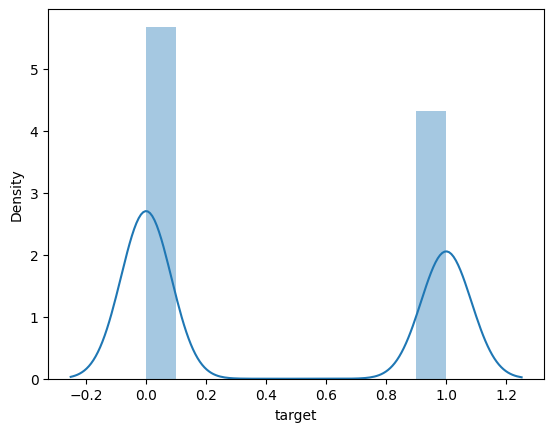

In [6]:
# 查看target的
import seaborn as sns
sns.distplot(datasets['target'])

# Bert分词

In [7]:
# 导包
import torch
from torch import nn
import torch.nn.functional as F
import torchtext
from transformers import BertTokenizer
from transformers.models.bert.modeling_bert import BertModel

In [8]:
# 声明BertModel
## 分词器
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

print(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [9]:
# test tokenizer
## 获取text
text = train_df['text'][0]
print('text:', text)
tokens = tokenizer.encode(text, return_tensors='pt')
print('token:', tokens)
text_from_ids = tokenizer.convert_ids_to_tokens(tokens[0])
print("text from ids:", text_from_ids)

text: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
token: tensor([[  101,  2256, 15616,  2024,  1996,  3114,  1997,  2023,  1001,  8372,
          2089, 16455,  9641,  2149,  2035,   102]])
text from ids: ['[CLS]', 'our', 'deeds', 'are', 'the', 'reason', 'of', 'this', '#', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all', '[SEP]']


84


<ipython-input-10-23dfbe72b755>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(length_list)


<Axes: xlabel='text', ylabel='Density'>

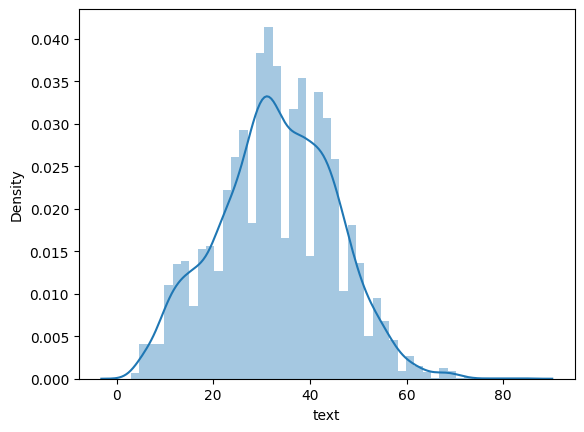

In [10]:
# 找出所有句子分词后的最大长度
length_list = datasets['text'].map(tokenizer.encode).map(len)
max_length=max(length_list)
print(max_length)
sns.distplot(length_list)

# datasets & dataloader

In [11]:
# 需要补全和截断
def bert_tokenizer(text):
    return tokenizer.encode_plus(text,
                                 return_tensors='pt',
                                 padding='max_length',
                                 max_length=64,
                                 truncation=True)['input_ids'][0]

bert_tokenizer(train_df['text'][0])

tensor([  101,  2256, 15616,  2024,  1996,  3114,  1997,  2023,  1001,  8372,
         2089, 16455,  9641,  2149,  2035,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])

In [12]:
# 加载自己的dataset
# 定义GetLoader类，继承Dataset方法，并重写__getitem__()和__len__()方法
class CustomDataset(torch.utils.data.Dataset):
	# 初始化函数，得到数据
    def __init__(self, data_file_path):
      data = pd.read_csv(data_file_path, header=None, names=['text', 'label'])
      self.token = data["text"].map(bert_tokenizer)
      self.label = data["label"]

    # index是根据batchsize划分数据后得到的索引，最后将data和对应的labels进行一起返回
    def __getitem__(self, index):
      text = self.token[index]
      label = self.label[index]
      return text, label
    # 该函数返回数据大小长度，目的是DataLoader方便划分，如果不知道大小，DataLoader会一脸懵逼
    def __len__(self):
      return len(self.label)

In [13]:
# 测试CustomDataset
dataset = CustomDataset('./test.csv')
text, label = dataset.__getitem__(0)
print("text:", text)
print("label:", label)

text, label = dataset.__getitem__(1)
print("text:", text)
print("label:", label)

text: tensor([  101,  1016,  2757,  1016,  5229,  1999,  2132,  1011,  2006, 12365,
         2006,  6358,  4886, 12996,  3307,  8299,  1024,  1013,  1013,  1056,
         1012,  2522,  1013,  1044, 10322,  6292,  2475,  2615,  9096,  2102,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])
label: 1
text: tensor([  101,  6441,  2089,  2022, 24280,  2021,  2025,  6404,  1012, 29347,
        28793,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [14]:
print(torchtext.__version__)

from torch.utils.data import DataLoader
train_dataset = CustomDataset("./train.csv")
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

0.17.1+cpu


In [15]:
# 查看数据
for i, data in enumerate(train_dataloader):
	# i表示第几个batch， data表示该batch对应的数据，包含data和对应的labels
    print("第 {} 个Batch \n{}".format(i, data))

第 0 个Batch 
[tensor([[  101,  2006,  1996,  ...,     0,     0,     0],
        [  101,  1030,  1019,  ...,     0,     0,     0],
        [  101,  1056,  4801,  ...,     0,     0,     0],
        ...,
        [  101,  1041, 24290,  ...,     0,     0,     0],
        [  101,  2003,  2009,  ...,     0,     0,     0],
        [  101,  2129,  2137,  ...,     0,     0,     0]]), tensor([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])]
第 1 个Batch 
[tensor([[  101,  3509,  2106,  ...,     0,     0,     0],
        [  101,  1005,  2175,  ...,     0,     0,     0],
        [  101,  2204,  2008,  ...,     0,     0,     0],
        ...,
        [  101,  3422,  2023,  ...,     0,     0,     0],
        [  101,  6857,  2543,  ...,     0,     0,     0],
        [  101, 19387,  3946,  ...,     0,     0,     0]]), tensor([1, 0, 0, 0, 0, 1, 1, 1

# 网络搭建

In [49]:
from torch.nn import Module, Linear
from transformers import BertModel
from torch.nn.init import normal_
class BertClassifier(Module):
    def __init__(self):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        # BERT hidden state size is 768, class number is 2(0/1)
        self.linear = Linear(768, 2)
        # initialing weights and bias
        normal_(self.linear.weight, std=0.02)
        normal_(self.linear.bias, 0)

    def forward(self, input_ids):
        # get last_hidden_state
        last_hidden_state = self.bert(input_ids)
        # only get first token 'cls'
        vec = last_hidden_state[0][:,0,:]
        vec = vec.view(-1, 768)

        out = self.linear(vec)
        return F.log_softmax(out)
classifier = BertClassifier()

In [50]:
from torch.nn import NLLLoss
# First, turn off the gradient for all parameters.
for param in classifier.parameters():
    param.requires_grad = False

# Second, turn on only last BERT layer.
for param in classifier.bert.encoder.layer[-1].parameters():
    param.requires_grad = True

# Finally, turn on classifier layer.
for param in classifier.linear.parameters():
    param.requires_grad = True


import torch.optim as optim

# The pre-learned sections should have a smaller learning rate, and the last total combined layer should be larger.
optimizer = optim.Adam([
    {'params': classifier.bert.encoder.layer[-1].parameters(), 'lr': 5e-5},
    {'params': classifier.linear.parameters(), 'lr': 1e-4}
])

# loss function
loss_function = NLLLoss()

# 训练

In [51]:
import torch
# set GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# send network to GPU
classifier.to(device)
losses = []

cuda:0


In [54]:
for epoch in range(10):
  all_loss = 0
  for idx, batch_data in enumerate(train_dataloader):
      batch_loss = 0
      classifier.zero_grad()
      # tensor to device
      input_ids = batch_data[0].to(device)
      label_ids = batch_data[1].to(device)
      out = classifier(input_ids)
      batch_loss = loss_function(out, label_ids)
      batch_loss.backward()
      optimizer.step()
      all_loss += batch_loss.item()
  print("epoch", epoch, "\t" , "loss", all_loss)

<ipython-input-49-8dd13ac2dde2>:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


epoch 0 	 loss 48.473236709833145
epoch 1 	 loss 43.29616637527943
epoch 2 	 loss 40.76029543578625
epoch 3 	 loss 38.02042704820633
epoch 4 	 loss 35.25122144818306
epoch 5 	 loss 31.81142818927765
epoch 6 	 loss 26.47605238109827
epoch 7 	 loss 20.800592347979546
epoch 8 	 loss 14.505613930523396
epoch 9 	 loss 10.472887488082051


# 评价

In [57]:
from sklearn.metrics import classification_report
answer = []
prediction = []
test_dataset = CustomDataset("./test.csv")
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
with torch.no_grad():
    for i, batch_data in enumerate(test_dataloader):

        text_tensor = batch_data[0].to(device)
        label_tensor = batch_data[1].to(device)

        score = classifier(text_tensor)
        _, pred = torch.max(score, 1)

        prediction += list(pred.cpu().numpy())
        answer += list(label_tensor.cpu().numpy())
print(classification_report(prediction, answer))

<ipython-input-49-8dd13ac2dde2>:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


              precision    recall  f1-score   support

           0       0.84      0.83      0.84       236
           1       0.73      0.75      0.74       145

    accuracy                           0.80       381
   macro avg       0.79      0.79      0.79       381
weighted avg       0.80      0.80      0.80       381

